In [42]:
import sgkit as sg
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import allel

#biological processes

panther_bp = pd.read_csv('/Users/christinagkertsou/Desktop/all_biol.txt',

sep='\t',

names=['term', "extra", 'ref', 'uploaded', 'expected', 'over/under', 'fold_enrichment', 'padj'])

In [43]:
panther_bp

,term,extra,ref,uploaded,expected,over/under,fold_enrichment,padj
0,posttranscriptional gene silencing (GO:0016441),17,6,0.71,+,8.47,2.260000e-04,2.910000e-02
1,post-transcriptional gene silencing by RNA (GO...,17,6,0.71,+,8.47,2.260000e-04,2.830000e-02
2,spliceosomal snRNP assembly (GO:0000387),17,6,0.71,+,8.47,2.260000e-04,2.760000e-02
3,gene silencing by RNA (GO:0031047),29,8,1.21,+,6.62,8.670000e-05,1.480000e-02
4,ribonucleoprotein complex assembly (GO:0022618),95,14,3.96,+,3.54,1.120000e-04,1.670000e-02
5,ribonucleoprotein complex subunit organization...,96,14,4.00,+,3.50,1.240000e-04,1.790000e-02
6,"mRNA splicing, via spliceosome (GO:0000398)",120,16,5.00,+,3.20,1.080000e-04,1.780000e-02
7,"RNA splicing, via transesterification reaction...",120,16,5.00,+,3.20,1.080000e-04,1.720000e-02
8,"RNA splicing, via transesterification reaction...",120,16,5.00,+,3.20,1.080000e-04,1.660000e-02
9,mRNA processing (GO:0006397),196,23,8.17,+,2.82,2.390000e-05,5.180000e-03


In [44]:
panther_bp['-log10padj'] = panther_bp.apply(lambda x: -np.log10(x.padj), axis=1)

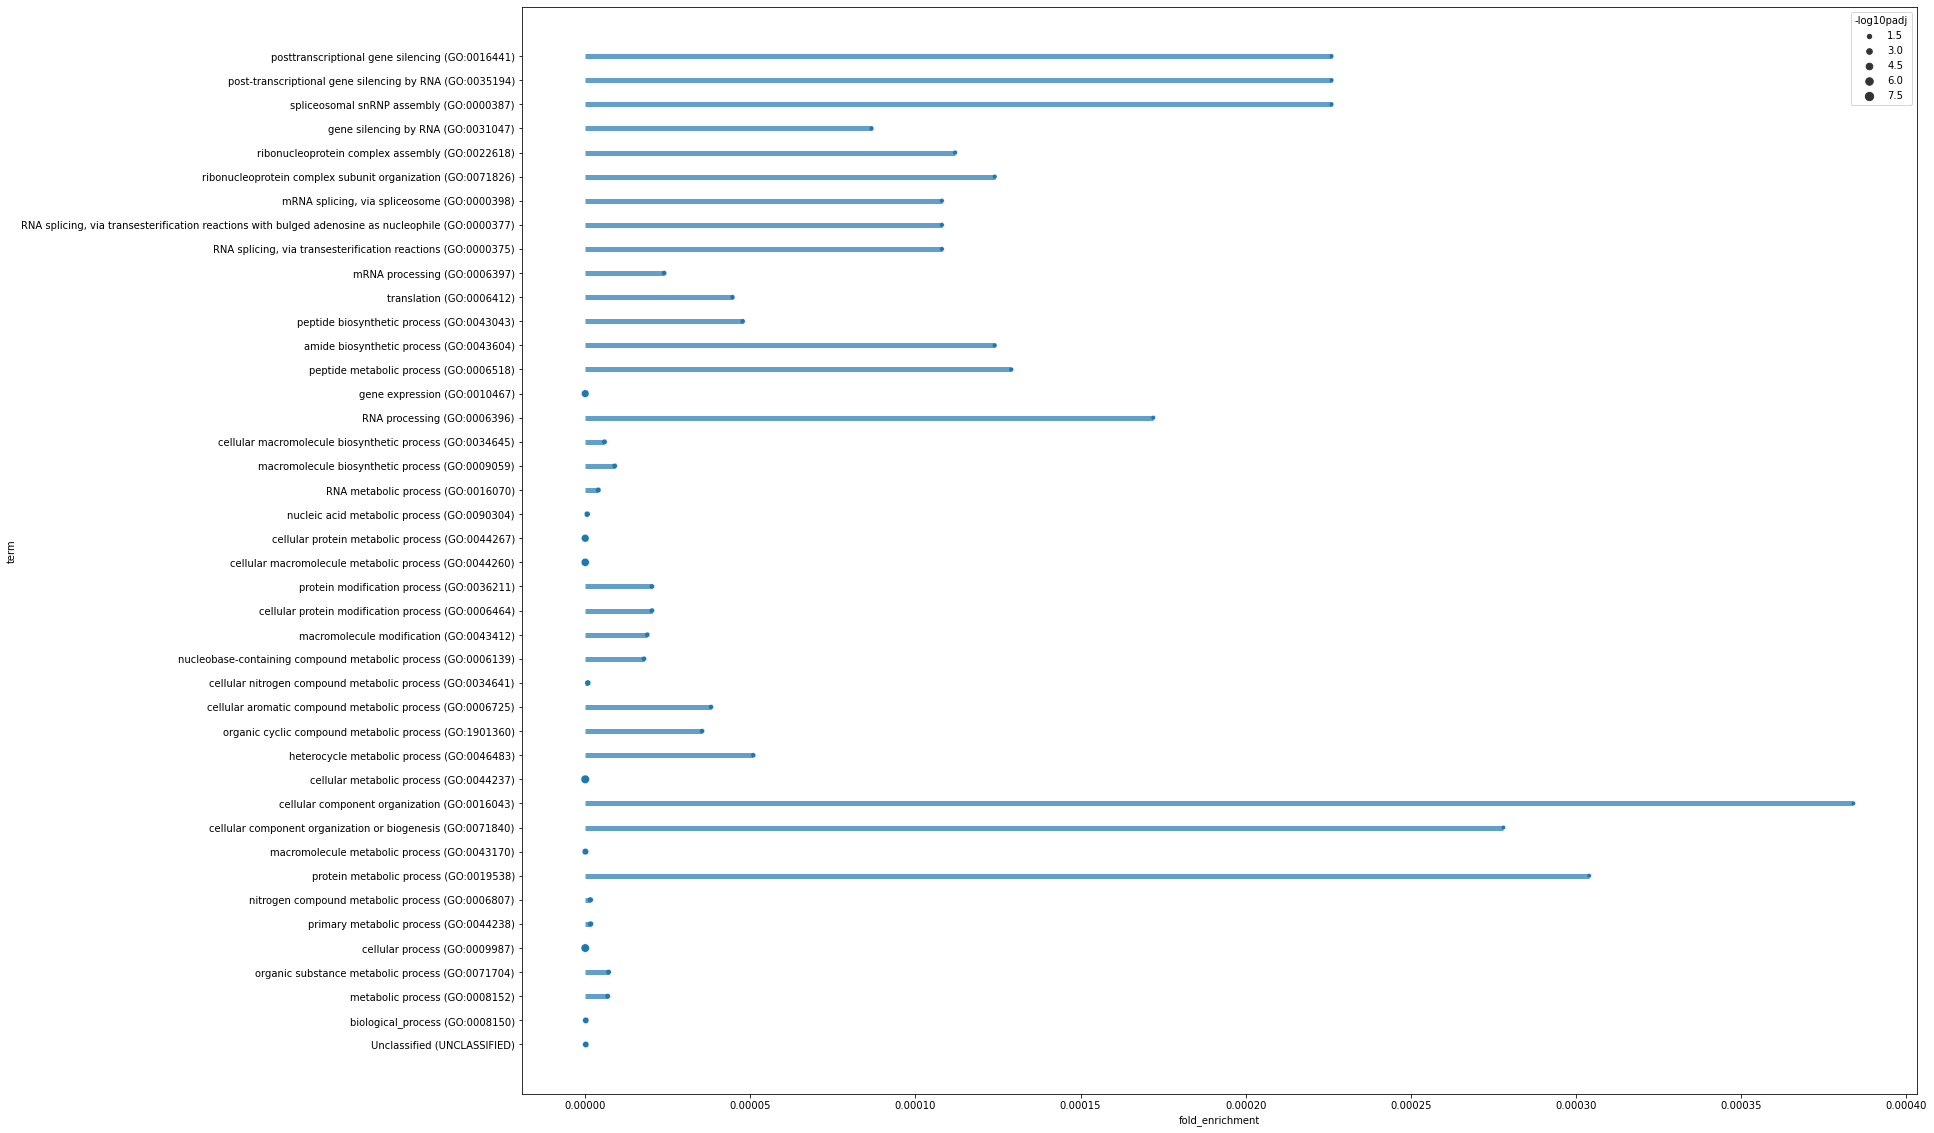

In [45]:
fig, ax1 = plt.subplots(figsize=(25, 20))
sns.scatterplot(data=panther_bp, x='fold_enrichment', y='term', size='-log10padj', ax=ax1)
ax1.hlines(y=panther_bp['term'], xmin=0, xmax=panther_bp['fold_enrichment'], linewidth=5, alpha=0.7)





In [46]:
#molecular functions
panther_mf = pd.read_csv('/Users/christinagkertsou/Desktop/all_mol.txt',

sep='\t',

names=['term', "extra", 'ref', 'uploaded', 'expected', 'over/under', 'fold_enrichment', 'padj'])

In [47]:
panther_mf

,term,extra,ref,uploaded,expected,over/under,fold_enrichment,padj
0,"catalytic activity, acting on RNA (GO:0140098)",190,22,7.87,+,2.80,0.000039,0.00506
1,"catalytic activity, acting on a nucleic acid (...",272,27,11.27,+,2.40,0.000070,0.00718
2,binding (GO:0005488),2865,165,118.67,+,1.39,0.000011,0.00563
3,molecular_function (GO:0003674),5666,289,234.69,+,1.23,0.000017,0.00292
4,Unclassified (UNCLASSIFIED),9882,355,409.31,-,0.87,0.000017,0.00438


In [48]:
panther_mf['-log10padj'] = panther_bp.apply(lambda x: -np.log10(x.padj), axis=1)

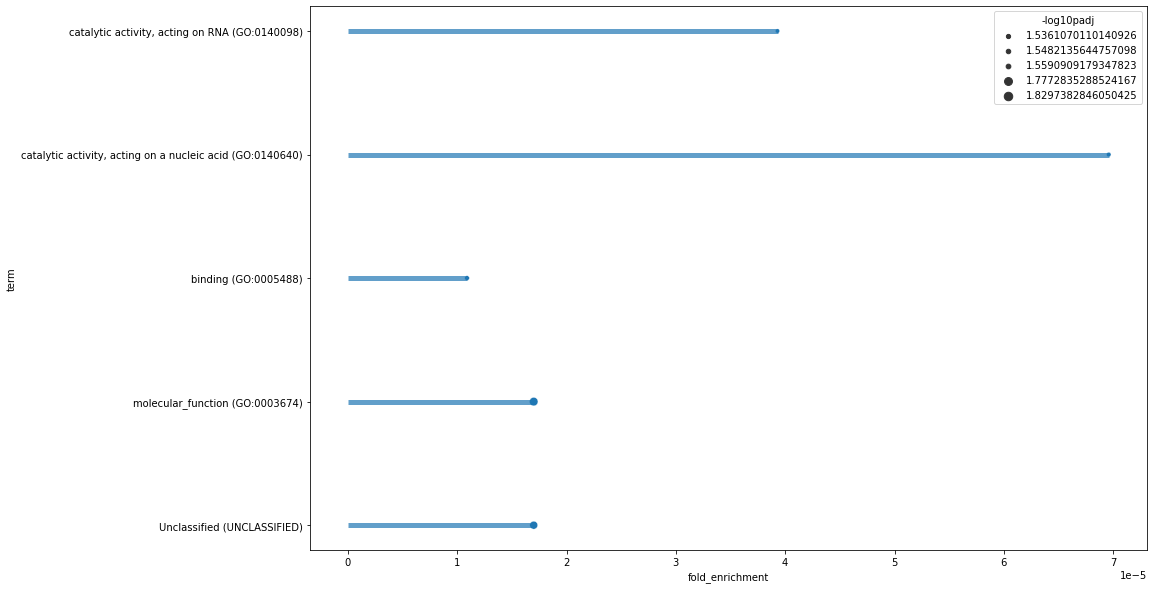

In [52]:
fig, ax2 = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=panther_mf, x='fold_enrichment', y='term', size='-log10padj', ax=ax2)
ax2.hlines(y=panther_mf['term'], xmin=0, xmax=panther_mf['fold_enrichment'], linewidth=5, alpha=0.7)
